LIST OF CONTENT - Intro to Data Visualization with Python_exercise

1. preparations
2. create and save plots - barplot - histogramm
3. create a sample
4. create a linechart

# 1. preparations

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [29]:
path=r'/Users/ru/Desktop/CF/04 Achievement 4_Python'

In [30]:
ords_prods_merge = pd.read_pickle(os.path.join(path,
'02_Data','2.2 Prepared Data', 'ords_prods_merge_4.8.pkl'))

# 2. create plots

Text(0.5, 1.0, 'Contribution of Orders per day of the week')

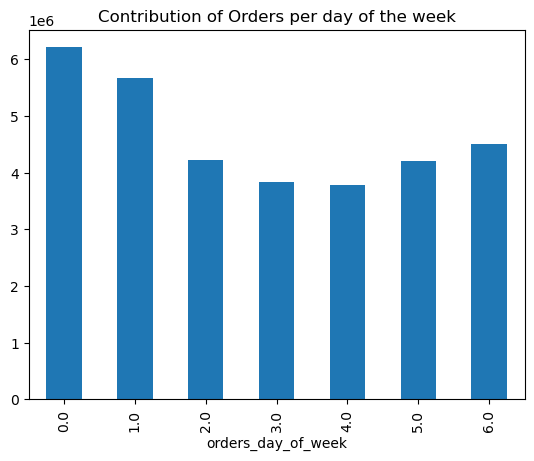

In [31]:
# create barplot and sort index
bar_orders_dow=ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
bar_orders_dow.set_title('Contribution of Orders per day of the week')

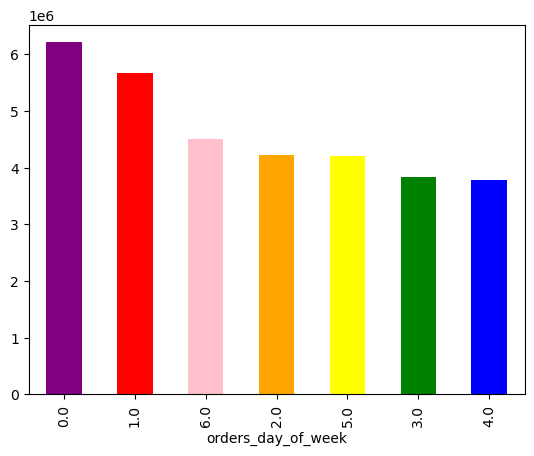

In [32]:
# assign colors - without index
bar_colorful = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [33]:
# save barplot
bar_orders_dow.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'bar_orders_dow.png'))

In [34]:
# save colorful barplot
bar_colorful.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'bar_orders_dow_color.png'))

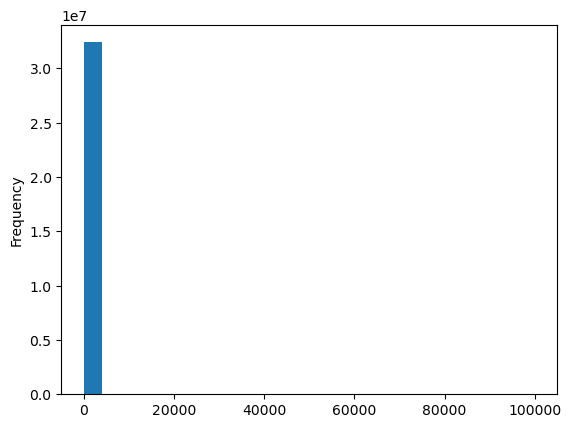

In [35]:
# create histogrammn
hist_price_range_25_bins=ords_prods_merge['prices'].plot.hist(bins = 25)

In [36]:
# checking why it has only one bar: 
ords_prods_merge['prices'].describe()

count    3.240487e+07
mean     1.198022e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

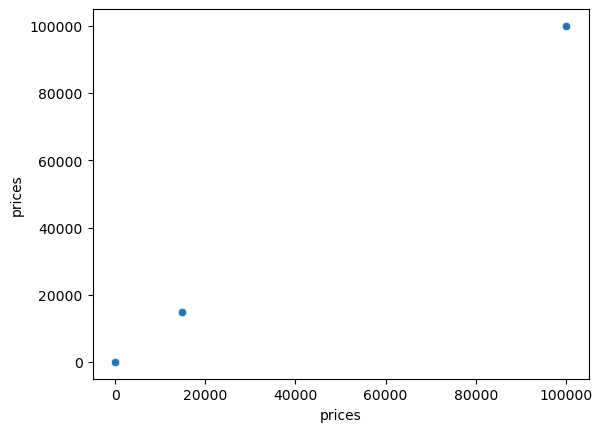

In [37]:
# searching for outliers in a scatterplot:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [38]:
# excluding prices higher than 100:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [39]:
#check results:
ords_prods_merge['prices'].max()

25.0

Text(0.5, 1.0, 'Price Range')

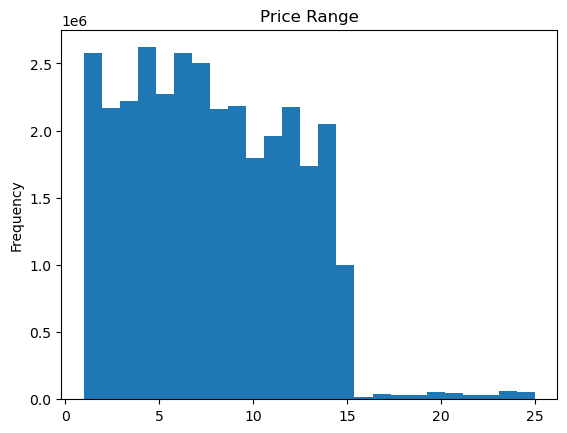

In [40]:
hist_price_range_25_bins=ords_prods_merge['prices'].plot.hist(bins = 25)
hist_price_range_25_bins.set_title('Price Range')


In [41]:
# save histogramm
hist_price_range_25_bins.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'hist_price_range_25_bins.png'))

Text(0.5, 1.0, 'Price Range')

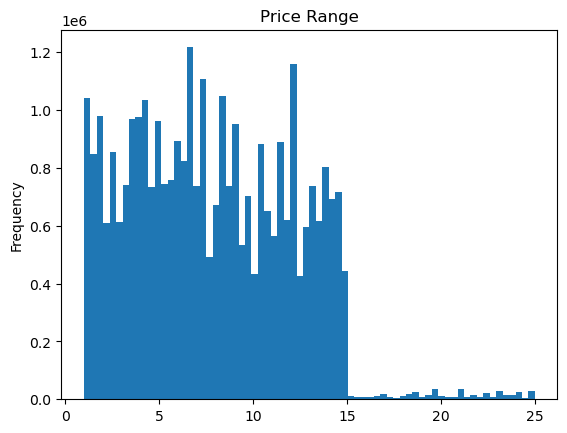

In [42]:
# changing bins
hist_price_range_70_bins=ords_prods_merge['prices'].plot.hist(bins = 70)
hist_price_range_70_bins.set_title('Price Range')

In [16]:
# save histogramm
hist_price_range_70_bins.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'hist_price_range_70_bins.png'))

In [43]:
ords_prods_merge.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'last_order (in days)', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest day', 'busiest days',
       'Most Orders', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_frequency', 'order_frequency_flag'],
      dtype='object')

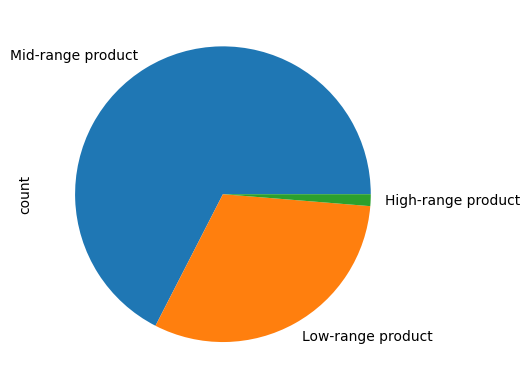

In [46]:
# creating a pie chart for clearer devision of prices
pie_pricerange=ords_prods_merge['price_range_loc'].value_counts().plot.pie()

In [47]:
# save histogramm
pie_pricerange.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'pie_pricerange.png'))

# 3. create a sample

In [48]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [49]:
dev

array([False,  True, False, ...,  True,  True, False])

In [50]:
# assign big part of the sample
big = ords_prods_merge[dev]


In [51]:
# assining small part of the sample
small = ords_prods_merge[~dev]

In [52]:
# check results
len(ords_prods_merge)

32435070

In [53]:
# check: lenght of samples == lenghts of hole dataset
len(big)+len(small)

32435070

# 4. create a linechart

In [54]:
# reducing to relevant columns
df_2 = small[['orders_day_of_week','prices']]

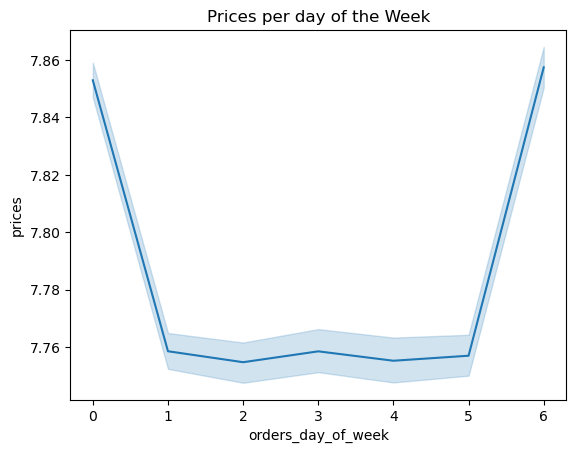

In [55]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
plt.title('Prices per day of the Week')


plt.show()


In [56]:
# save linechart
line.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'line_order_dow_prices.png'))

In [57]:
ords_prods_merge.dtypes

Unnamed: 0               float64
product_id                 int64
product_name              object
aisle_id                 float64
department_id            float64
prices                   float64
order_id                 float64
user_id                  float64
order_number             float64
orders_day_of_week       float64
order_hour_of_day        float64
last_order (in days)     float64
add_to_cart_order        float64
reordered                float64
_merge                  category
price_range_loc           object
busiest day               object
busiest days              object
Most Orders               object
max_order                float64
loyalty_flag              object
mean_prices              float64
spending_flag             object
median_frequency         float64
order_frequency_flag      object
dtype: object

In [58]:
ords_prods_merge.to_pickle(os.path.join(path, '02_Data','2.2 Prepared Data', 'ords_prods_merge_4.9.ex.pkl'))